In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [66]:
vv = [0,1,5,3]
print(sorted(vv))

[0, 1, 3, 5]


In [67]:
def act_thresh(eps, α, u):
    if u == 0:
        return eps
    elif u == 1:
        return 1
    
    α1 = 1 - α
    x = (u * (1 - np.power(eps, α1)) + np.power(eps, α1)) ** (1 / α1)
    return x

def ab_mask_thresh(mu, eps, α, m, r_s, r_i, α_m):
    t_r_s = act_thresh(eps, α, 1-r_s)
    t_r_i = act_thresh(eps, α, 1-r_i)
    n_rev_r_s = (1-t_r_s**(1-α))/(1 - eps**(1-α))
    n_rev_r_i = (1-t_r_i**(1-α))/(1 - eps**(1-α))
    
    mean_a = (1 - α)*(1- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a2 = (1 - α)*(1- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean_a_s_rev = (1 - α)*(1 - t_r_s**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a_i_rev = (1 - α)*(1 - t_r_i**(2-α))/((2-α)* (1-eps**(1-α)))

    mean2_a_s_rev = (1 - α)*(1 - t_r_s**(3-α))/((3-α)* (1-eps**(1-α)))
    mean2_a_i_rev = (1 - α)*(1 - t_r_i**(3-α))/((3-α)* (1-eps**(1-α)))

    n_rev = sorted([n_rev_r_i, n_rev_r_s]) #il più piccolo corrisponde alla soglia maggiore
    m_a = sorted([mean_a_i_rev, mean_a_s_rev])#più piccolo soglia minore
    m2_a = sorted([mean2_a_i_rev, mean2_a_s_rev])#più piccolo soglia minore

    f_rev_n = 1 + (α_m - 1) * n_rev[1] + α_m *(α_m -1)* n_rev[0]
    f_rev_a = mean_a + (α_m - 1) * m_a[0] + α_m *(α_m -1)* m_a[1]
    f_rev_a2 = mean_a2 + (α_m - 1)* m2_a[0] + α_m *(α_m -1)* m2_a[1]

    λ_t = mu* (m*(f_rev_a + np.sqrt(f_rev_n * f_rev_a2)))**(-1)
    return λ_t, mean_a

def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

In [68]:
function ab_mask_thresh(mu, eps, α, m, r_s, r_i, α_m)
    t_r_s = act_thresh(eps, α, 1 - r_s)
    t_r_i = act_thresh(eps, α, 1 - r_i)
    n_rev_r_s = (1-t_r_s^(1-α))/(1 - eps^(1-α))
    n_rev_r_i = (1-t_r_i^(1-α))/(1 - eps^(1-α))
    mean_a = (1 - α)*(1- eps^(2-α))/((2-α)* (1-eps^(1-α)))
    mean_a2 = (1 - α)*(1- eps^(3-α))/((3-α)* (1-eps^(1-α)))
    mean_a_s_rev = (1 - α)*(1 - t_r_s^(2-α))/((2-α)* (1-eps^(1-α)))
    mean_a_i_rev = (1 - α)*(1 - t_r_i^(2-α))/((2-α)* (1-eps^(1-α)))
    mean2_a_s_rev = (1 - α)*(1 - t_r_s^(3-α))/((3-α)* (1-eps^(1-α)))
    mean2_a_i_rev = (1 - α)*(1 - t_r_i^(3-α))/((3-α)* (1-eps^(1-α)))
    
    n_rev = sort([n_rev_r_i, n_rev_r_s])
    m_a = sort([mean_a_i_rev, mean_a_s_rev])
    m2_a = sort([mean2_a_i_rev, mean2_a_s_rev])

    f_rev_n = 1 + α_m * n_rev[2] + α_m *(α_m -1)* n_rev[1]
    f_rev_a = mean_a + α_m * m_a[1] + α_m *(α_m -1)* m_a[2]
    f_rev_a2 = mean_a2 + α_m * m2_a[1] + α_m *(α_m -1)* m2_a[2]

    λ_t = mu* (m*(f_rev_a + sqrt(f_rev_n * f_rev_a2)))^(-1)
    return λ_t, mean_a
end



SyntaxError: invalid syntax (Temp/ipykernel_2980/2650919401.py, line 1)

In [69]:

def ab_mask_thresh_buu(mu, eps, α, m, r_s, r_i, α_m):
    t_r_s = act_thresh(eps, α, r_s)
    t_r_i = act_thresh(eps, α, r_i)
    n_r_s = (t_r_s**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    n_r_i = (t_r_i**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    
    mean_a = (1 - α)*(1- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a2 = (1 - α)*(1- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean_a_s = (1 - α)*(t_r_s**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a_i = (1 - α)*(t_r_i**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))

    mean2_a_s = (1 - α)*(t_r_s**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean2_a_i = (1 - α)*(t_r_i**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))

    n_rev = sorted([n_r_i, n_r_s])#il più piccolo corrisponde alla soglia maggiore
    m_a = sorted([mean_a_i, mean_a_s])#il più piccolo corrisponde alla soglia minore
    m2_a = sorted([mean2_a_i, mean2_a_s])# il più piccolo corrisponde alla soglia minore

    f_rev_n = 1 + α_m * n_rev[0] + α_m *(α_m -1)* n_rev[1]
    f_rev_a = mean_a + α_m  * m_a[1] + α_m *(α_m -1)* m_a[0]
    f_rev_a2 = mean_a2 + α_m * m2_a[1] + α_m *(α_m -1)* m2_a[0]

    λ_t = mu* (m*(f_rev_a + np.sqrt(f_rev_n * f_rev_a2)))**(-1)
    return λ_t, mean_a


In [70]:
lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0.8, 0.1, 0.9)
print(lam_t)
lam_tu, minau = ab_mask_thresh_buu(0.01, 0.001, 2.1, 2, 0.8, 0.1, 0.9)
print(lam_tu)

0.192798422122403
0.15703088253960898


## Face mask effectiveness 10%

In [80]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0,0,0.9)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
iErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri[j, i] = lam / ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id,0.9)[0]
print(iErri)

[[1.75       1.67958281 1.67416882 ... 1.58688186 1.58610071 1.58531966]
 [1.67958281 1.59825599 1.59275128 ... 1.50875616 1.50801229 1.50726855]
 [1.67416882 1.59275128 1.58677039 ... 1.50287516 1.50213241 1.50138978]
 ...
 [1.58688186 1.50875616 1.50287516 ... 1.42047417 1.41969789 1.41892167]
 [1.58610071 1.50801229 1.50213241 ... 1.41969789 1.41898735 1.41821073]
 [1.58531966 1.50726855 1.50138978 ... 1.41892167 1.41821073 1.4175    ]]


In [81]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.2 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)

iErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        iErri2[j, i] = lam /  ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.9)[0]
print(iErri2)

[[1.2        1.15171393 1.14800147 ... 1.08814756 1.08761191 1.08707634]
 [1.15171393 1.09594696 1.09217231 ... 1.03457565 1.03406557 1.03355558]
 [1.14800147 1.09217231 1.08807113 ... 1.03054297 1.03003365 1.02952442]
 ...
 [1.08814756 1.03457565 1.03054297 ... 0.97403943 0.97350712 0.97297486]
 [1.08761191 1.03406557 1.03003365 ... 0.97350712 0.9730199  0.97248736]
 [1.08707634 1.03355558 1.02952442 ... 0.97297486 0.97248736 0.972     ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_2980/3528007242.py:14: UserWarning: No contour levels were found within the data range.
  contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])


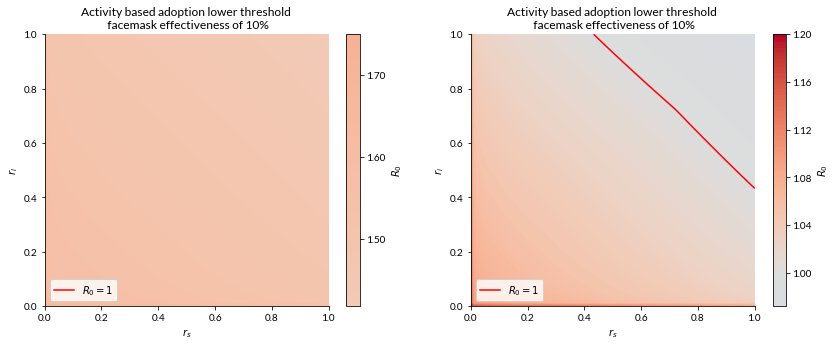

In [82]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))


contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, iErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption lower threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(r_s, r_i, iErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.04))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.04))

# Apply the custom formatter to the color bar ticks
cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()


# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption lower threshold \n facemask effectiveness of 10%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_rmask_10_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## Face mask effectiveness 30%

In [85]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 1,1,1)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
sErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri[j, i] = lam / ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.7)[0]
print(sErri)

[[1.75       1.58093595 1.5676093  ... 1.32095995 1.31853529 1.31610687]
 [1.58093595 1.30676756 1.29245296 ... 1.08232886 1.08034487 1.07835808]
 [1.5676093  1.29245296 1.27308937 ... 1.06431964 1.06235179 1.06038116]
 ...
 [1.32095995 1.08232886 1.06431964 ... 0.86545374 0.86317591 0.86089274]
 [1.31853529 1.08034487 1.06235179 ... 0.86317591 0.86148493 0.85919714]
 [1.31610687 1.07835808 1.06038116 ... 0.86089274 0.85919714 0.8575    ]]


In [86]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 1,1,1)
lam = 1.2 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
sErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        sErri2[j, i] = lam / ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.7)[0]
print(sErri2)

[[1.2        1.08407036 1.07493209 ... 0.90580111 0.90413848 0.90247328]
 [1.08407036 0.89606919 0.88625346 ... 0.74216836 0.74080791 0.73944554]
 [1.07493209 0.88625346 0.87297557 ... 0.72981918 0.7284698  0.72711851]
 ...
 [0.90580111 0.74216836 0.72981918 ... 0.59345399 0.59189206 0.59032645]
 [0.90413848 0.74080791 0.7284698  ... 0.59189206 0.59073252 0.58916375]
 [0.90247328 0.73944554 0.72711851 ... 0.59032645 0.58916375 0.588     ]]


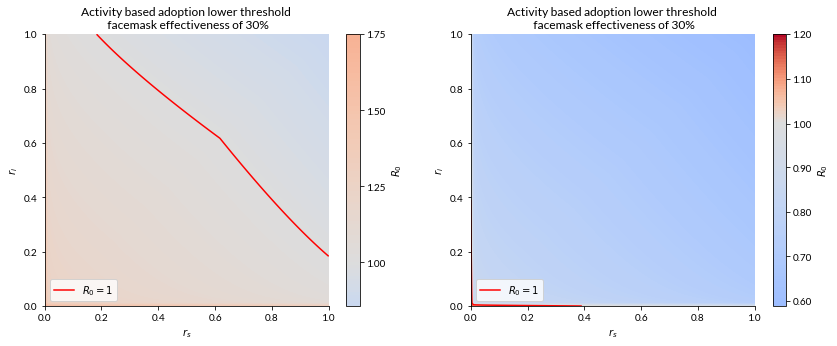

In [87]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(sErri.min(), sErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, sErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(r_s, r_i, sErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.25))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.25))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption lower threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(sErri2.min(), sErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, sErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, sErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption lower threshold \n facemask effectiveness of 30%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_rmask_30_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

## Face mask effectiveness 50%

In [88]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.75 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
cErri = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        cErri[j, i] = lam / ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.5)[0]
print(cErri)

[[1.75       1.54596488 1.52908666 ... 1.12451625 1.1199694  1.11540196]
 [1.54596488 1.0361581  1.01633391 ... 0.73736469 0.73447072 0.73156442]
 [1.52908666 1.01633391 0.97926998 ... 0.70608808 0.70327076 0.70044143]
 ...
 [1.12451625 0.73736469 0.70608808 ... 0.44909388 0.44541385 0.44170088]
 [1.1199694  0.73447072 0.70327076 ... 0.44541385 0.44333398 0.43960348]
 [1.11540196 0.73156442 0.70044143 ... 0.44170088 0.43960348 0.4375    ]]


In [89]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = lam_t, mina = ab_mask_thresh(0.01, 0.001, 2.1, 2, 0,0,1)
lam = 1.2 * lam_t

r_s = np.linspace(0.0, 1, 100)
r_i = np.linspace(0.0, 1, 100)
cErri2 = np.zeros((len(r_s), len(r_i)))

for i, r_sd  in enumerate(r_s):
    for j, r_id in enumerate(r_i):
        cErri2[j, i] = lam / ab_mask_thresh(0.01, 0.001, 2.1, 2, r_sd, r_id, 0.5)[0]
print(cErri2)

[[1.2        1.0600902  1.04851656 ... 0.77109686 0.76797902 0.76484706]
 [1.0600902  0.71050841 0.69691468 ... 0.5056215  0.50363707 0.50164417]
 [1.04851656 0.69691468 0.67149942 ... 0.48417468 0.4822428  0.48030269]
 ...
 [0.77109686 0.5056215  0.48417468 ... 0.30795009 0.30542664 0.3028806 ]
 [0.76797902 0.50363707 0.4822428  ... 0.30542664 0.30400044 0.30144239]
 [0.76484706 0.50164417 0.48030269 ... 0.3028806  0.30144239 0.3       ]]


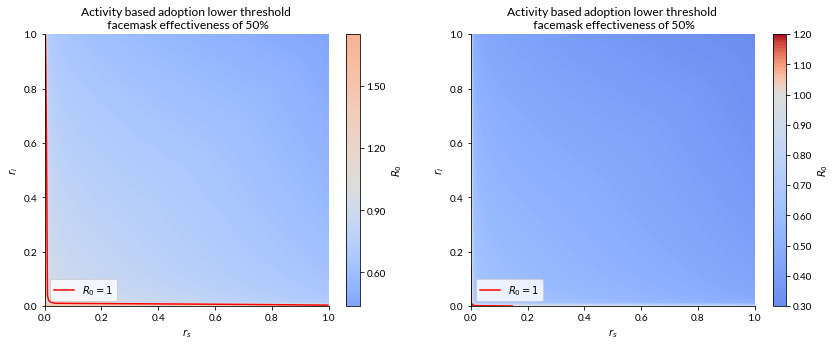

In [90]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(cErri.min(), cErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(r_s, r_i, cErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

# Plot contour lines
contour = ax[0].contour(r_s, r_i, cErri, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.3))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.3))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()


# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$r_s$")
ax[0].set_ylabel(r"$r_i$")
ax[0].set_title("Activity based adoption lower threshold \n facemask effectiveness of 50%")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[0].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits


contour_levels2 = np.linspace(cErri2.min(), cErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(r_s, r_i, cErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour2 = ax[1].contour(r_s, r_i, cErri2, colors="red", levels=[1])
#contour2 = ax.contour(pis, gam, Erri, colors="black", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_0 = 1\,$")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$r_s$")
ax[1].set_ylabel(r"$r_i$")
ax[1].set_title("Activity based adoption lower threshold \n facemask effectiveness of 50%")
ax[1].set_xlim(r_s.min(), r_s.max())  # Set x-axis limits
ax[1].set_ylim(r_i.min(), r_i.max())  # Set y-axis limits
for axs in ax:    
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)
file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_rmask_50_phase_space.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
# Show the plot
plt.show()

